# Кривая выживаемости. Обучение.

**Кривая выживаемости, survival curve** — **кривая продолжительности жизни** — показывает долю особей определённой группы доживших до определённого возраста.

Это одна из самых важных моделей с помощью которых анализируют интервенции (лекарства, процедуры и другие).

Текущие задачи:
- Посмотреть видео "[Кривые дожития, Закон Гомпертца и корреляция Стрелера—Милдвана [Aging Math]](https://youtu.be/kdO44AO4l-4)"
  - можно ли проверять модели не на выживаемости, а на интенсивности старения? Как её померить?
- Посмотреть файл "[Кривые дожития, Закон Гомпертца, старение и корреляция Стрелера—Милдвана.ipynb](https://colab.research.google.com/drive/1Po-OMzIJ_4hVVj5O7btc8OmjJlu0N3cQ)"
  - нет всех названий графиков, каждой оси графиков, легенды графика из-за чего график не понятен с первого взгляда — сделать все подписи для своих графиков
  - на первом графике с оранжевой и синей кривой, синяя получается это кривая смерти, раз она без старения?
  - графики показывают скорость старения, можно ли померить естественную скорость омоложения? Это будет скорость обновления? Скорость репарации? Как понять на сколько скорость старения сильно отличается от скорости омоложения.
- Определить в эксперименте с 2 группами особей, не обязательно равного размера по количеству, какая живет лучше и дольше
- Сделать с группами следующее:
  1. Посчитать тест Капкана-Маера
  2. Посчитать тест Колмогорова-Смирнова
  3. Посчитать Log-rank тест
  4. Сравнить результаты, понять отличие
  5. Оценить нормальность распределения

**Необходимые знания**

- Основы теории вероятностей

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.ticker import MultipleLocator
from scipy.stats import gamma

In [2]:
df = pd.read_csv('data/data_example.csv')[:90]
df

,Unnamed: 0,Day,first_group_number,first_group_number_LEFT,second_group_number,second_group_number_LEFT,total_number,total_number_LEFT,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,0,1.0,244.0,0.0,297.0,0.0,541.0,0.0,NaN,NaN,NaN,NaN,NaN
1,1,2.0,244.0,0.0,297.0,0.0,541.0,0.0,NaN,NaN,NaN,NaN,NaN
2,2,3.0,244.0,0.0,297.0,0.0,541.0,0.0,NaN,NaN,NaN,NaN,NaN
3,3,4.0,244.0,0.0,297.0,0.0,541.0,0.0,NaN,NaN,NaN,NaN,NaN
4,4,5.0,244.0,0.0,297.0,0.0,541.0,0.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,85,86.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
86,86,87.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
87,87,88.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
88,88,89.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


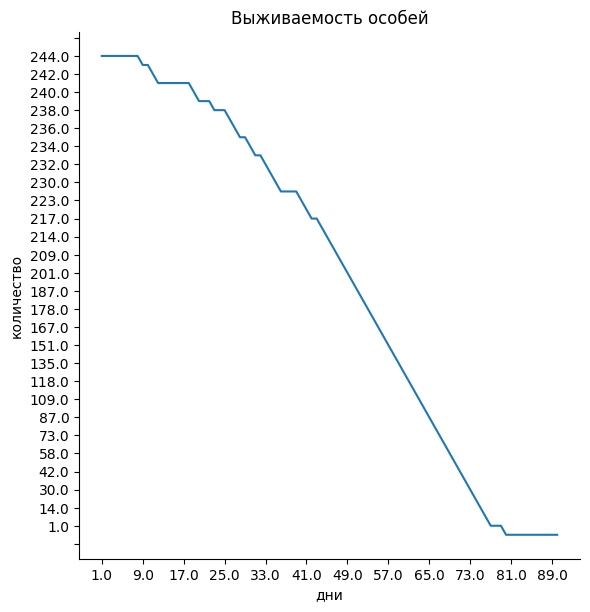

In [4]:
g = sns.relplot(data=df, x='Day', y='first_group_number', height=6, aspect=1/1, kind='line');
for ax in g.axes.flat:
    ax.xaxis.set_major_locator(MultipleLocator(8))
    ax.yaxis.set_major_locator(MultipleLocator(2))
g.set(xlabel='дни', ylabel='количество')
g.set(title='Выживаемость особей')
plt.show();